## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from helper import *
from visualizations import *

%load_ext autoreload
%autoreload 2

## Data

The [database](https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#) contains records for 1885 respondents. For each respondent, 12 attributes are known:
- personality measurements -- NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking)
- level of education
- age
- gender
- country of residence
- ethnicity.

In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepines, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers.

For each drug, they selected ‘Never Used’, ‘Used over a Decade Ago’, ‘Used in Last Decade’, ‘Used in Last Year’, ‘Used in Last Month’, ‘Used in Last Week’, and ‘Used in Last Day’.

In [2]:
drug = pd.read_csv('data/drug_consumption.data', header=None, index_col=0)

In [3]:
#rename columns
drug.columns = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity',
               'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore',
               'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos',
               'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy',
               'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
               'Nicotine', 'Semer', 'VSA']

In [4]:
# Convert standardized values into categories
category_converter(drug)

### Ordinal quantification of Data

Convert ordinal categorical columns into numerical values

In [5]:
drug = encoding(drug)

In [5]:
per = {'SS': 'Sensation-seeking',
       'Oscore': 'Openness to experience',
       'Cscore': 'Conscientiousness',
       'Impulsive': 'Impusivity',
       'Ascore': 'Agreeableness',
       'Escore': 'Extraversion',
       'Nscore': 'Neuroticism'}

personality_cols = []
for col in drug.columns[5:12]:
    drug.rename({col: per[col]}, axis=1, inplace=True)
    personality_cols.append(per[col])

## Exploratory Data Analysis

### Personalities

[NEO Five-Factor Inventory (NEO-FFI-R)](https://arxiv.org/pdf/1506.06297.pdf) 60-item inventory comprised of five personality domains or factors: N, E, O, A, and C with 12 items per domain.

1. **Neuroticism (N)**:
    - long-term tendency to experience negative emotions such as nervousness, tension, anxiety and depression


2. **Extraversion (E)**:
    - manifested in outgoing, warm, active, assertive, talkative, cheerful, and in search of stimulation characteristics


3. **Openness to experience (O)**:
    - general appreciation for art, unusual ideas, and imaginative, creative, unconventional, and wide interests


4. **Agreeableness (A)**:
    - dimension of interpersonal relations, characterized by altruism, trust, modesty, kindness, compassion and cooperativeness


5. **Conscientiousness (C)**:
    - tendency to be organized and dependable, strong-willed, persistent, reliable, and efficient


Barratt **Impulsiveness** Scale (BIS-11), a 30-item self-report questionnaire that measures the behavioral construct of impulsiveness, and comprises three subscales: motor impulsiveness, attentional impulsiveness, and non-planning. The ‘motor’ aspect reflects acting without thinking, the ‘attentional’ component poor concentration and thought intrusions, and the ‘non-planning’ a lack of consideration for consequences. The higher BIS-11 scores, the higher the impulsivity level.


Impulsiveness **Sensation-Seeking** (ImpSS), combines the traits of impulsivity (Imp) and sensation-seeking (SS): search for experiences and feelings, that are "varied, novel, complex and intense", and by the readiness to "take physical, social, legal, and financial risks for the sake of such experiences."

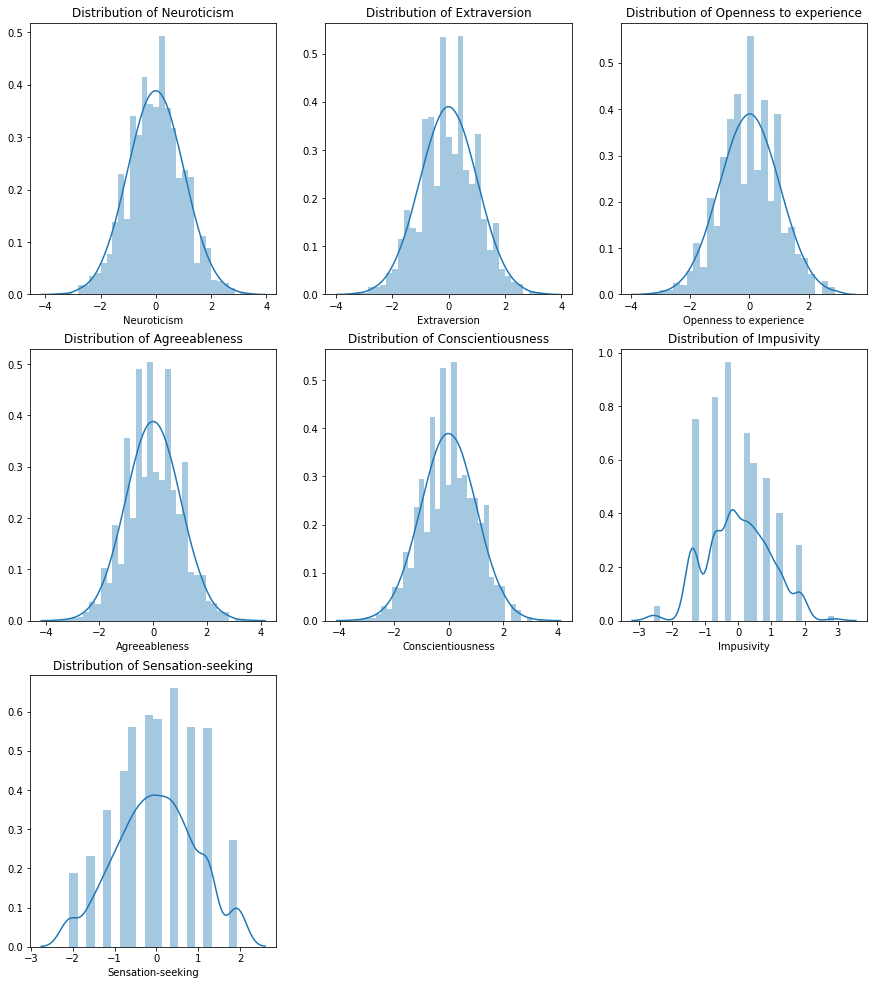

In [9]:
# distributions of each personality type
plot_personality_distribution(drug, personality_cols)

### Drugs

In [11]:
# define drug columns
drug_cols = ['Alcohol', 'Amphet', 'Amyl', 'Benzos',
             'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy',
             'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
             'Nicotine', 'Semer', 'VSA']

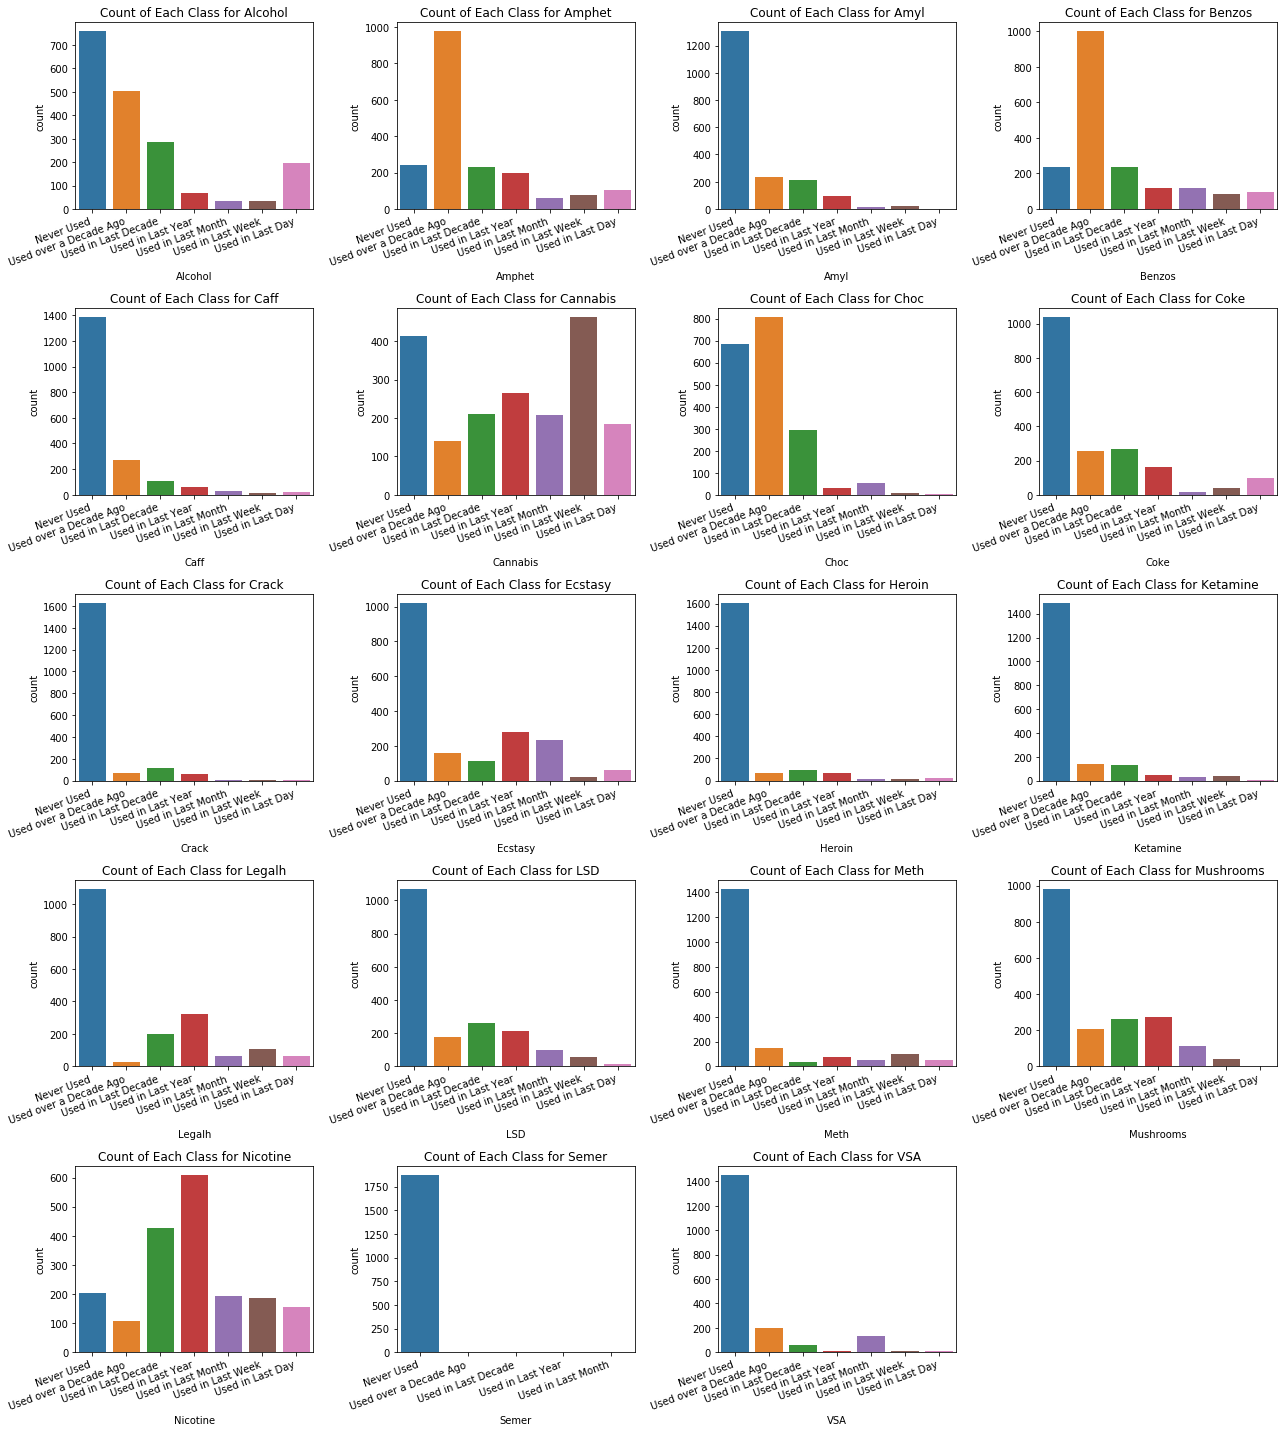

In [13]:
# define each class
classes = ['Never Used', 'Used over a Decade Ago', 'Used in Last Decade',
           'Used in Last Year', 'Used in Last Month', 'Used in Last Week', 'Used in Last Day']

# count of the classes for each drug
plot_countplot(drug, drug_cols, 'class', classes)

In [12]:
# define user and non-user for each drug
for col in drug_cols:
    drug[f"{col}_User"] = [0 if (x == 'CL0') | (x == 'CL1') else 1
                         for x in drug[col]]

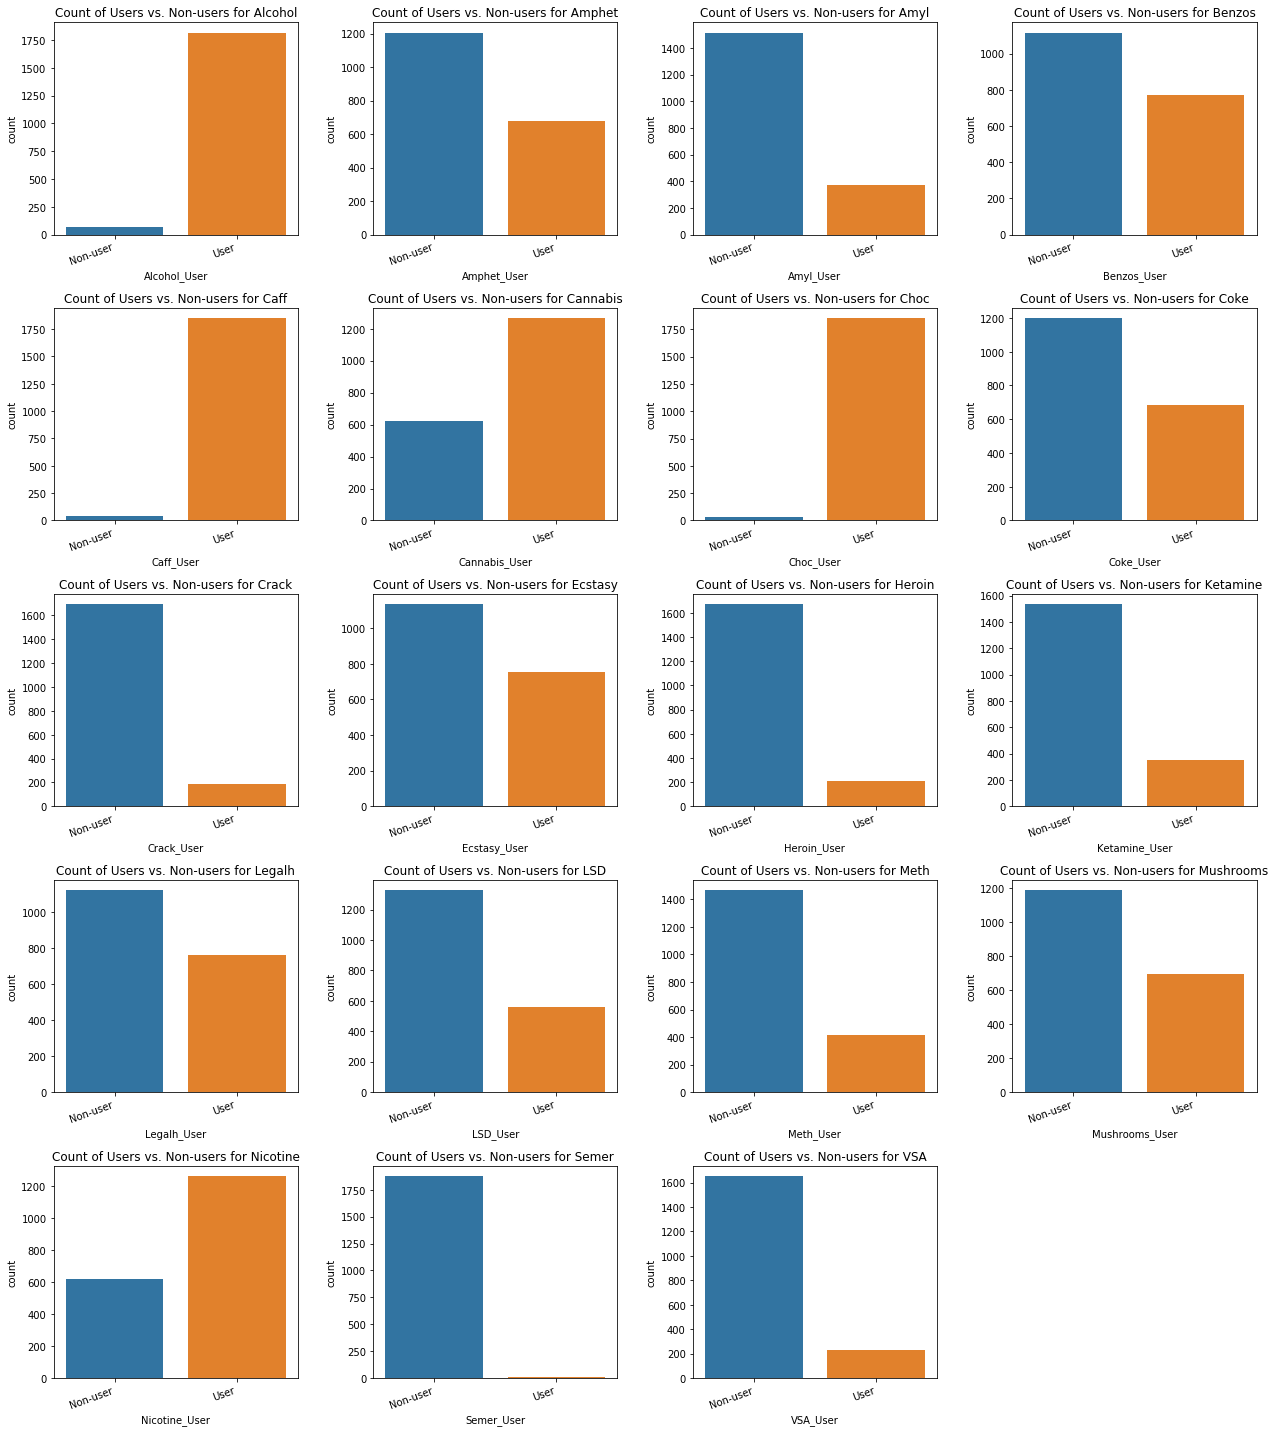

In [16]:
# count of users and non-users for each drug
plot_countplot(drug, drug_cols, 'user', ['Non-user', 'User'])

In [18]:
# plot map of number of drug users in the world
country = ['UK', 'USA', 'Canada', 'Australia', 'Ireland', 'New Zealand']

plot_map(drug, country)

### Correlation between personalities and drugs

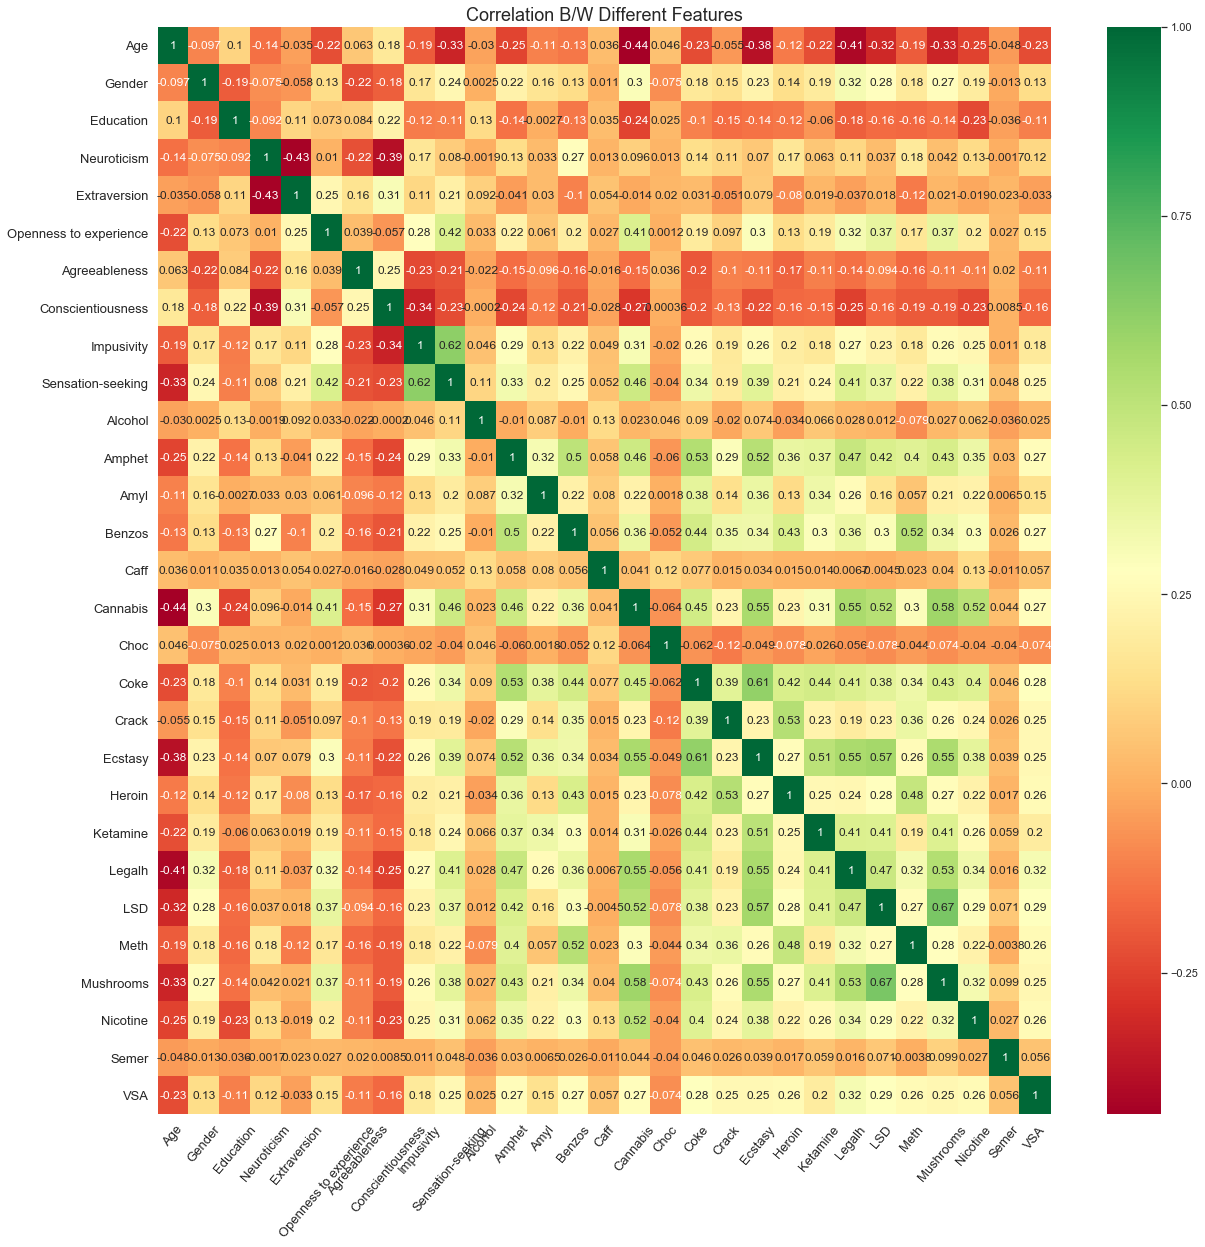

In [42]:
corrmat = drug.corr()

plot_correlation(drug.drop(['Country', 'Ethnicity'], axis=1),
                 corrmat);

## Cannabis and Ecstasy Data

### Cannabis

In [10]:
# filter for just Cannabis Users
cannabis = drug[['Cannabis_User', 'Age', 'Gender', 'Education',
                 'Country', 'Ethnicity'] + personality_cols]

cannabis.rename({'Cannabis_User': 'User'}, axis=1, inplace=True)
cannabis.drop(columns=['Country', 'Ethnicity'], axis=1, inplace=True)

# save Cannabis DataFrame for future use
cannabis.to_csv('data/cannabis.csv', index=False)

### Ecstasy

In [11]:
# filter for just Ecstasy Users
ecstasy = drug[['Ecstasy_User', 'Age', 'Gender', 'Education',
                 'Country', 'Ethnicity'] + personality_cols]

ecstasy.rename({'Ecstasy_User': 'User'}, axis=1, inplace=True)
ecstasy.drop(columns=['Country', 'Ethnicity'], axis=1, inplace=True)

# save Ecstasy DataFrame for future use
ecstasy.to_csv('data/ecstasy.csv', index=False)

## Exploratory Data Analysis of Cannabis and Ecstasy

In [15]:
cannabis = pd.read_csv('data/cannabis.csv')
ecstasy = pd.read_csv('data/ecstasy.csv')

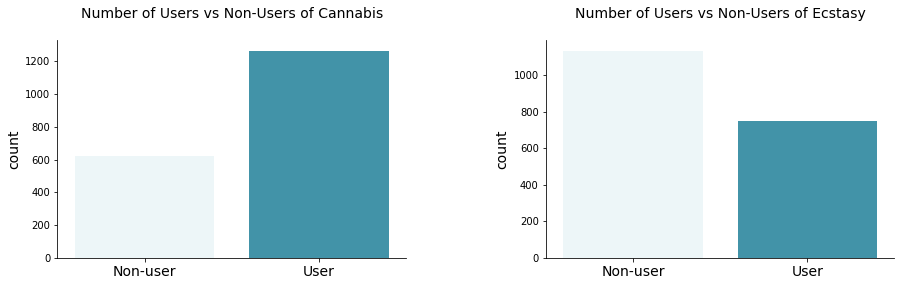

In [23]:
plot_user_count([cannabis, ecstasy], ['Cannabis', 'Ecstasy'])

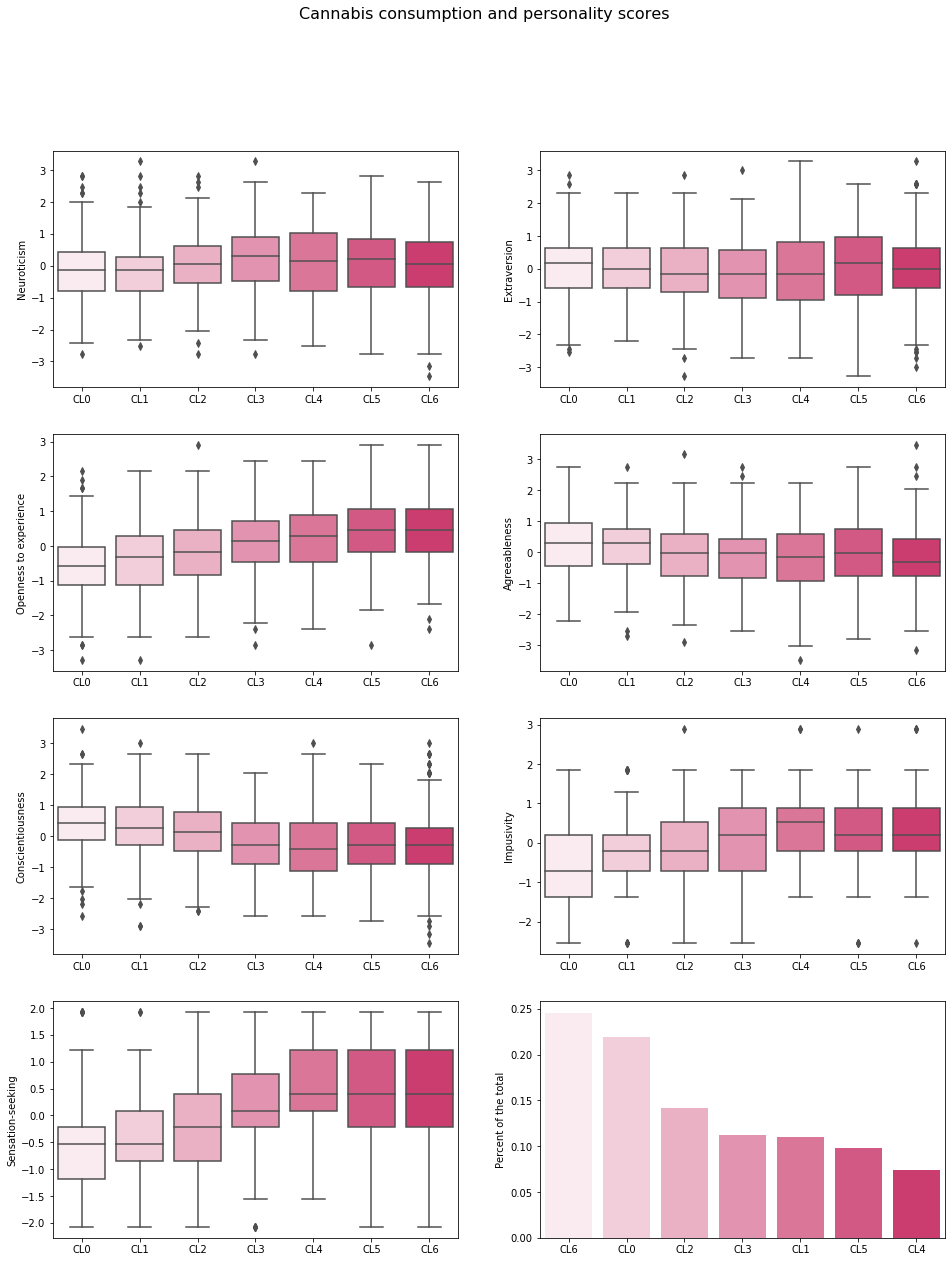

In [6]:
# plot distribution of personalities for each class for Cannabis
plot_personality(drug, personality_cols, 'Cannabis')

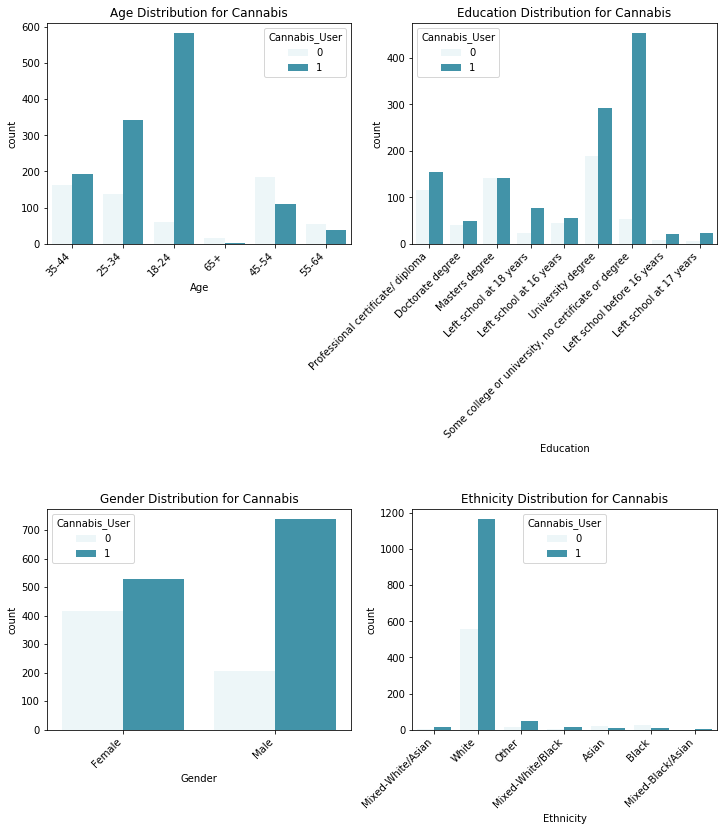

In [13]:
# plot distribution of demographic features for Cannabis
plot_feature_dist(drug, 'Cannabis')

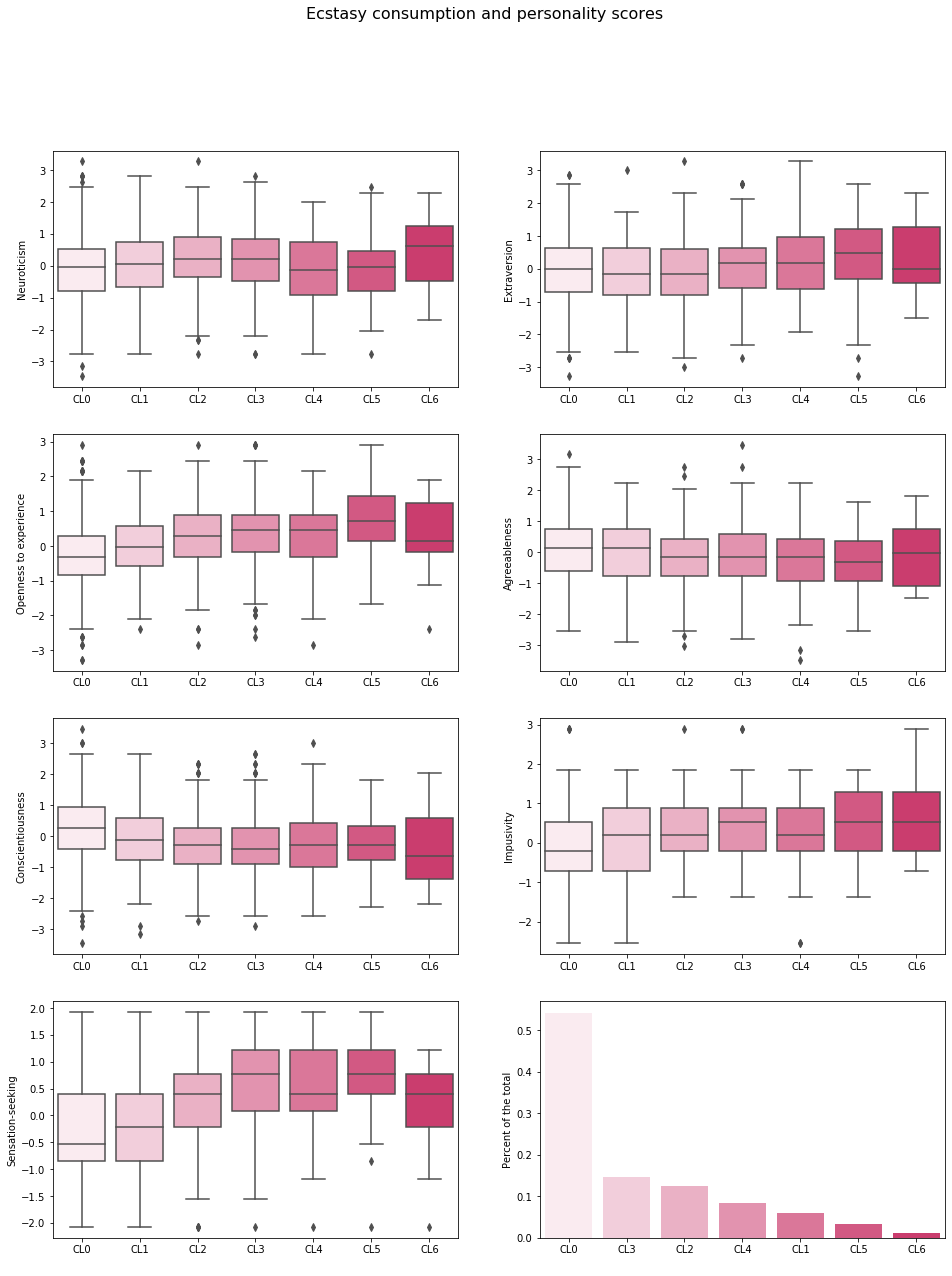

In [7]:
# plot distribution of personalities for each class for Cannabis
plot_personality(drug, personality_cols, 'Ecstasy')

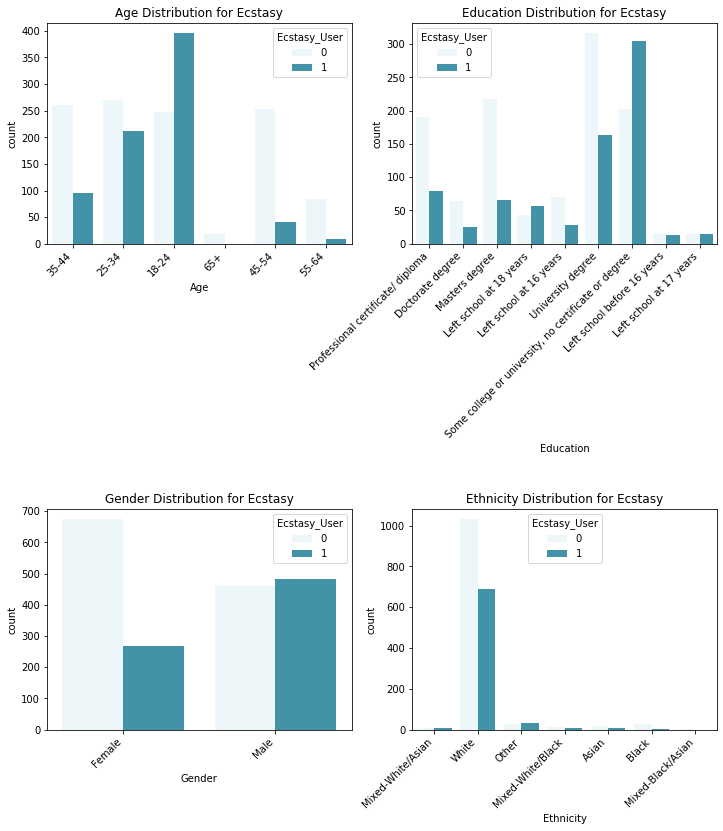

In [14]:
# plot distribution of demographic features for Ecstasy
plot_feature_dist(drug, 'Ecstasy')